# Programa Avançado em Data Science e Decisão 
## Data Science Deploy


<h3 style="color:brown"> CRIANDO UMA MÁQUINA VIRTUAL NO AZURE (GRATUITA)</h3>


* 1. Acesse a página do Azure: 
https://azure.microsoft.com/pt-br . Clique em "Conta Gratuita"

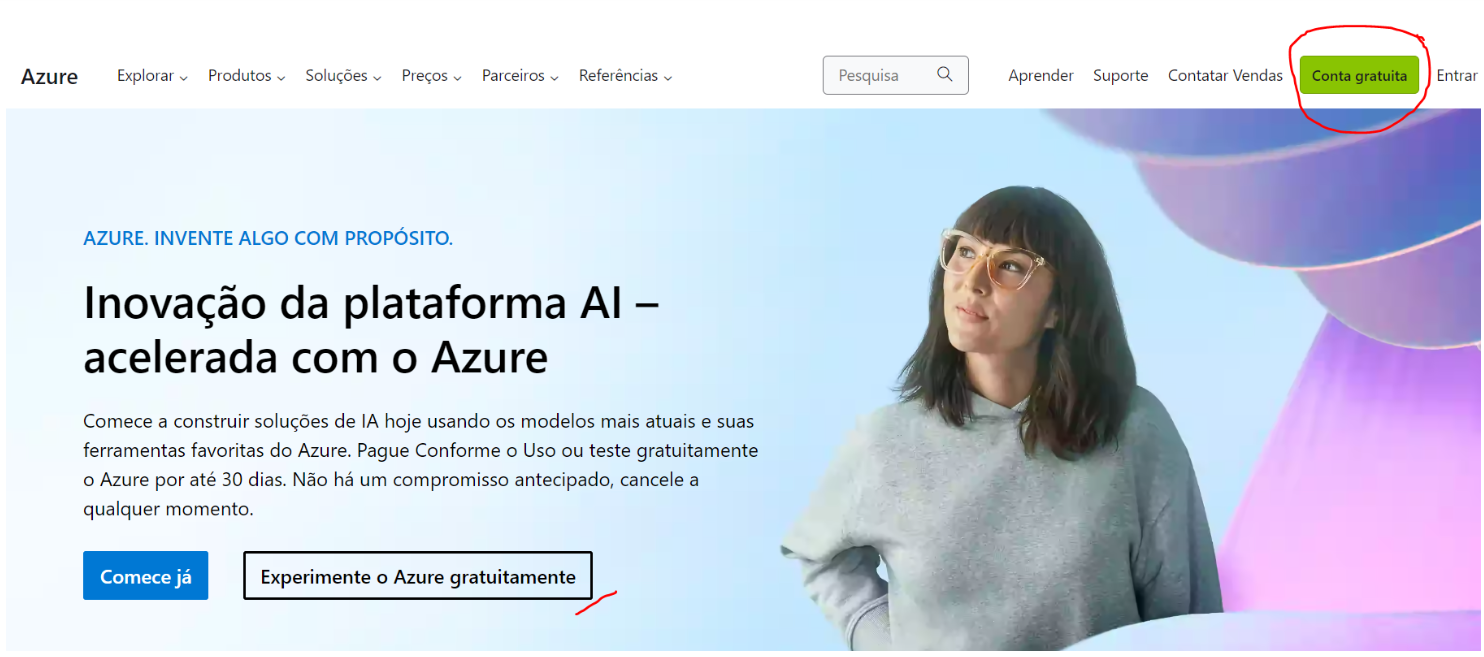


* 2. Filtre os serviços por “gratuitos”

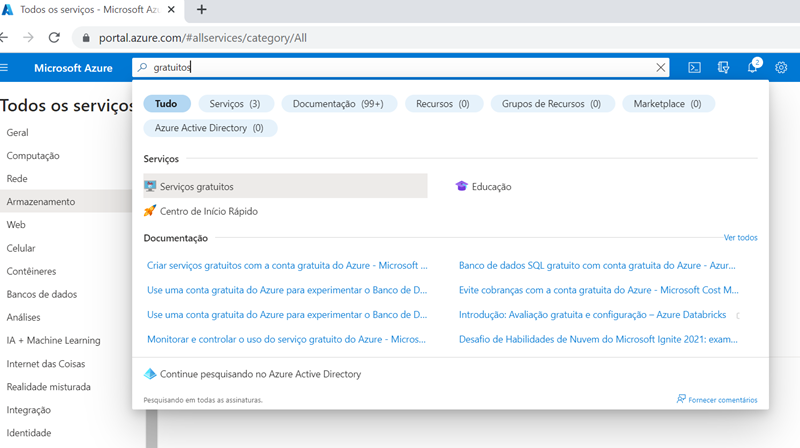



* 3. Selecione uma máquina virtual linux B1S:


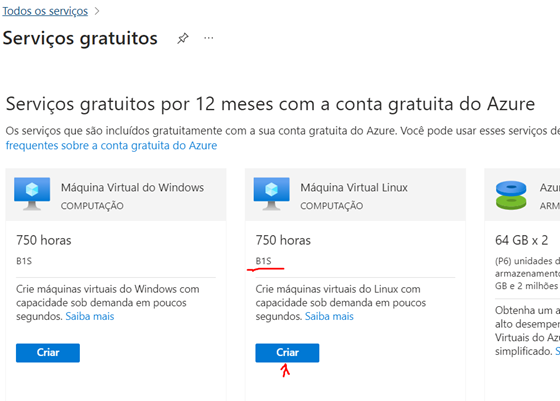

4. Crie a máquina virtual:

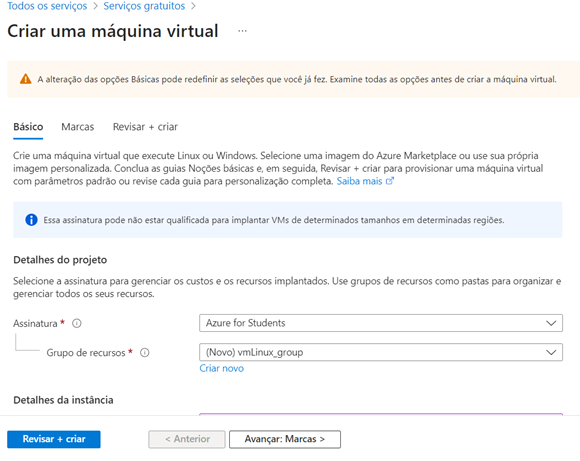


* Role a tela para preencher as configurações. Observe que o tamanho da VM é a Standard B1s – 1vcpu 1GB de memória. 

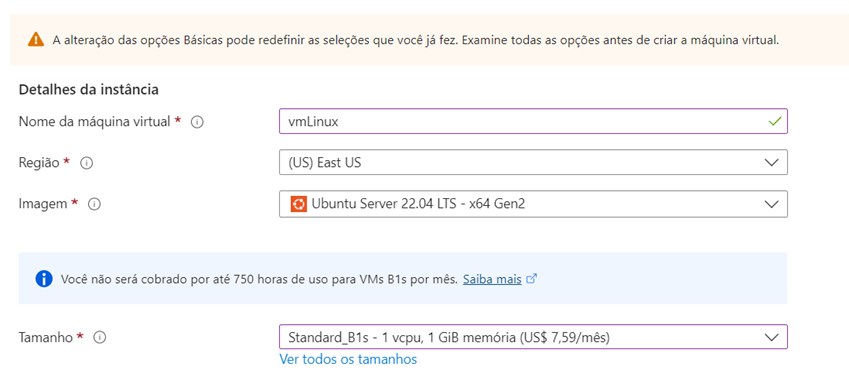

* O tipo de autenticação deve ser o SSH, observe que o Azure criará um par de chaves SSH pública que você precisa guardar para usar no futuro.

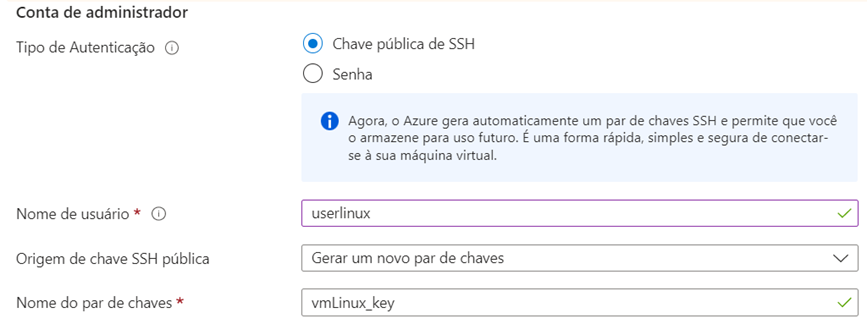

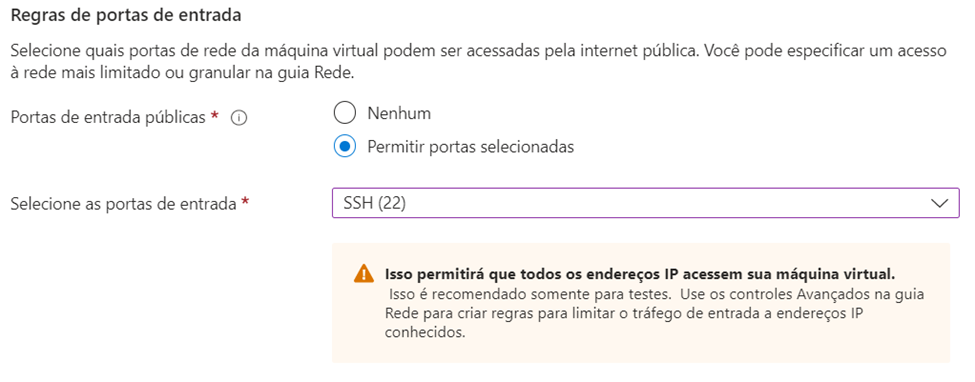



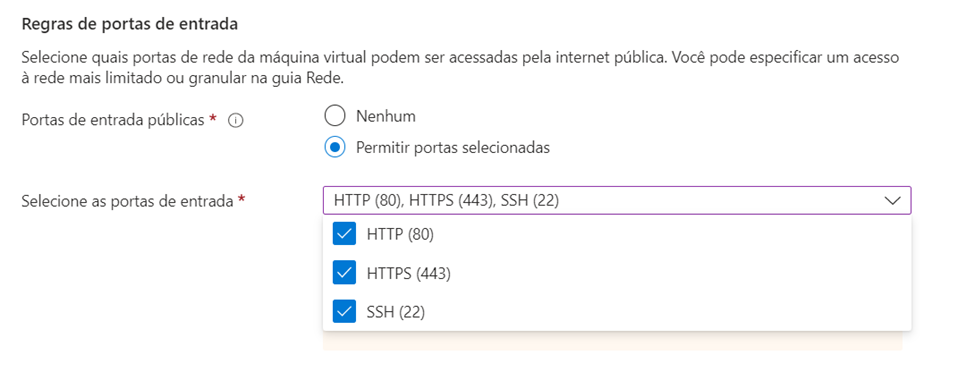

* Ao clicar no botão revisar + criar. A VM será criada e ao finalizar a tela abaixo é mostrada:

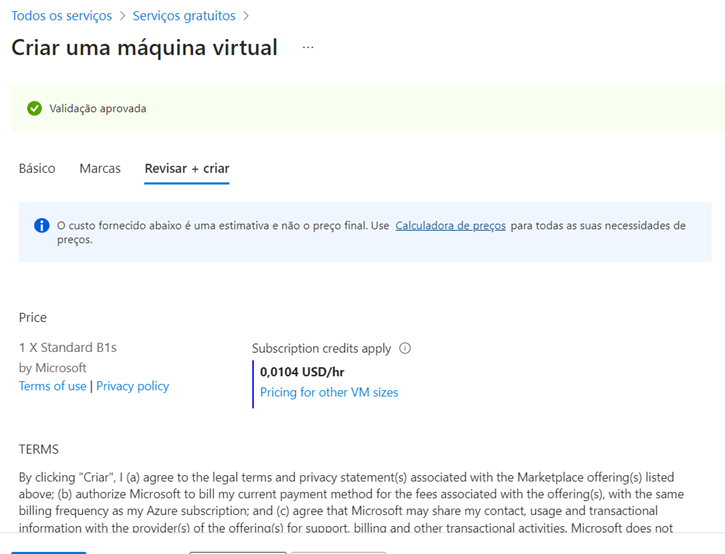

* Mostra a configuração da máquina virtual:

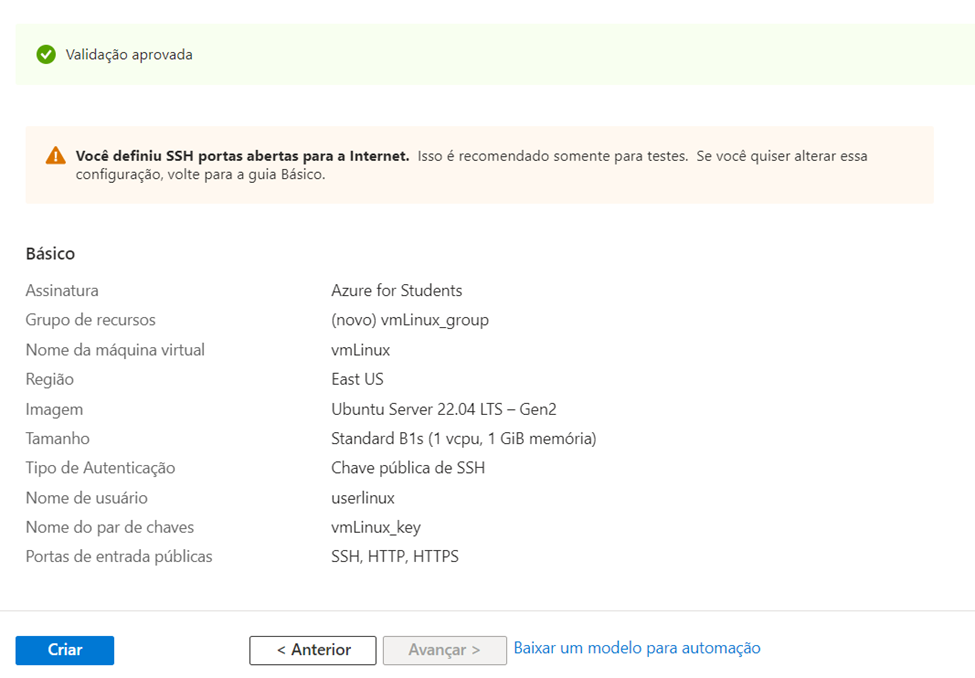


* Só clicar no botão “Criar” para finalizar a criação da máquina virtual.

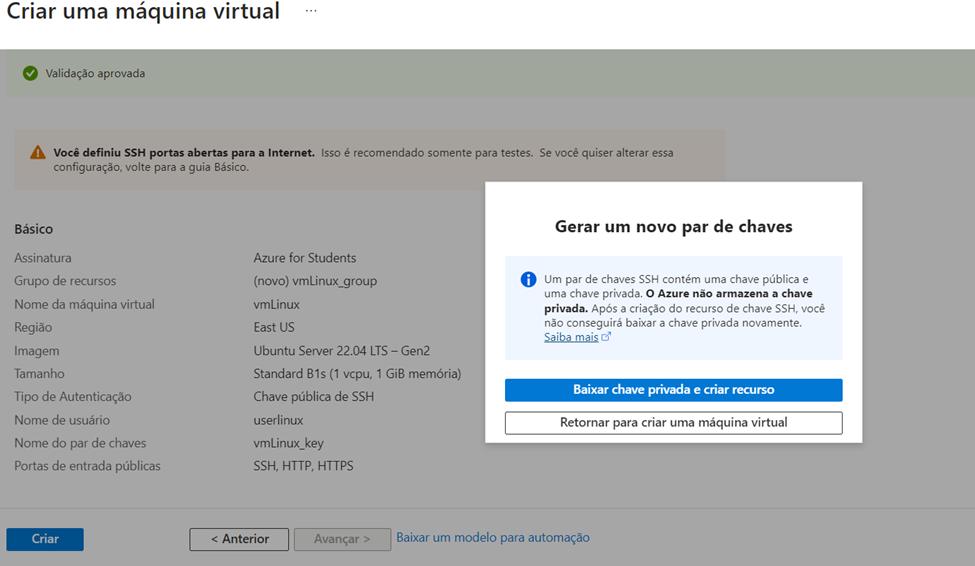


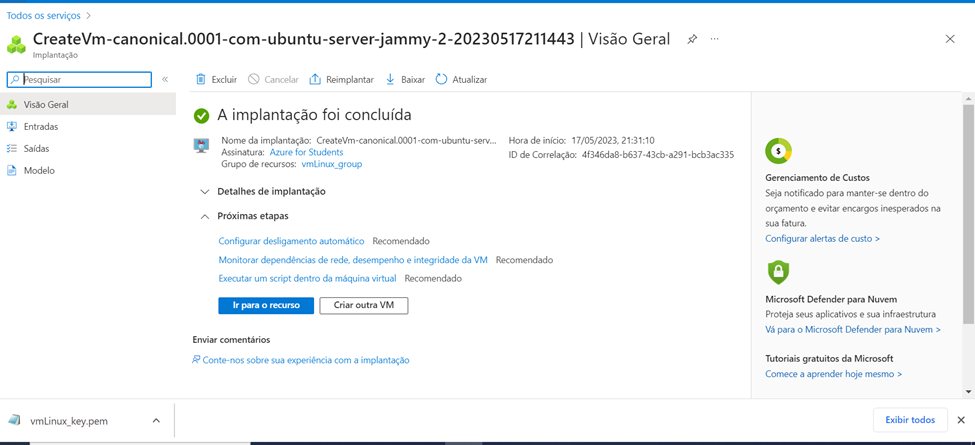



<h3 style="color:brown"> CUIDADO! NÃO ESQUEÇA ONDE SALVOU O PAR DE CHAVES SSH.<h3>

## Configuração para Desbloqueio de Portas 

É necessário nos serviços em núvem, liberar as portas para acesso aos serviços, note que neste caso as portas 22, 443, 80, 8080 e 5000 estão liberadas para entradas (inbound), mas todas as outras estão bloqueadas por seguranças: 

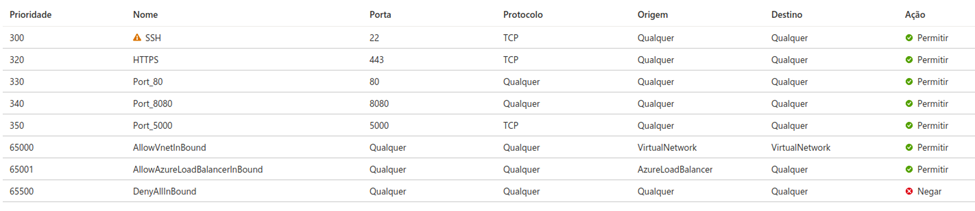

* Porta do Flask é a 5000


##  Gerenciamento de custos do Azure


<h4 style="color:brown"> FIQUE ATENTO!  A seleção de recursos do Azure pode gerar cobranças indesejadas <h4>
    
    
1. Para consultar os valores cobrados pelos recursos em uso, consulte por “gerenciamento de custo”
    
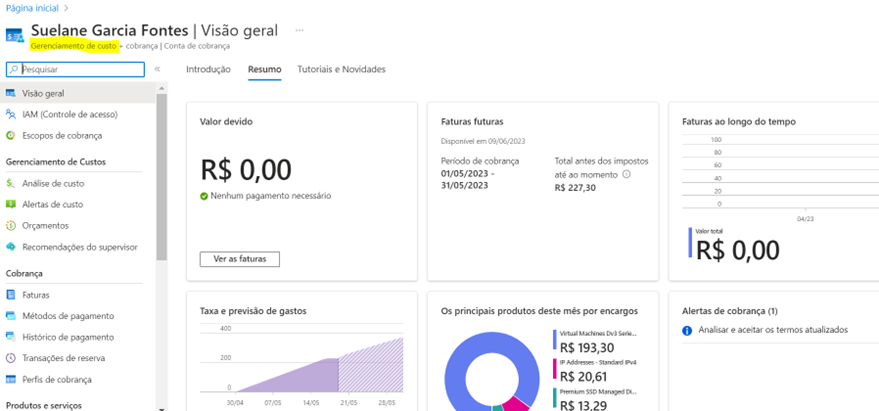
    
   

2. Para consultar a fatura:

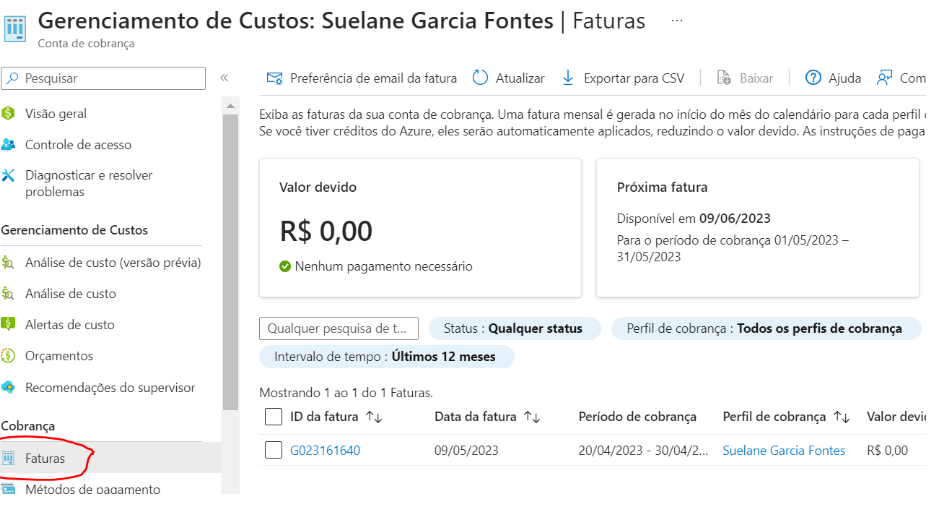
    

## Testando o acesso para máquina Virtual (VM Azure) por meio da máquina Local

1. Na Máquina Local acesse a **VM Azure utilizando o SSH**

A Chave SSH foi salva na pasta de ssh do ubuntu, exemplo: /home/suelanegf/.ssh/

* Digitei ssh o caminho onde está salva a chave pública, o usuario e IP da VM, exemplo:


    sudo ssh -i ~/.ssh/vmLinux_key.pem userlinux@20.172.243.195


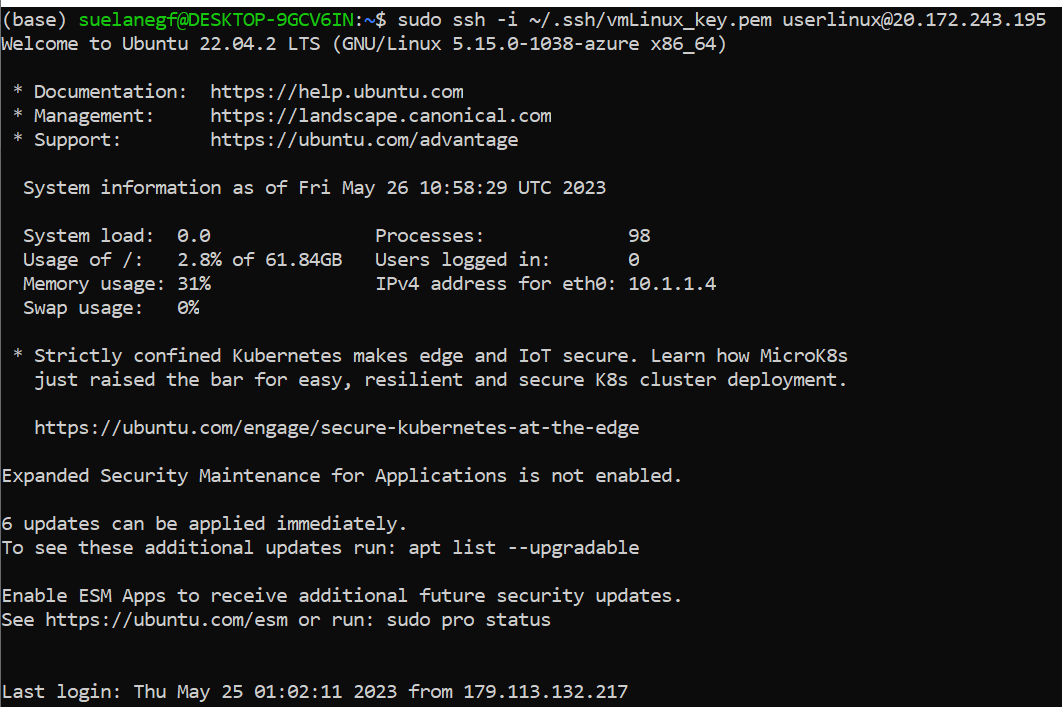

2.	Criar uma pasta para armazenar os arquivos .py. **Ex. mkdir LAB01_PADS_DEPLOY**
3.	Criar a biblioteca de funções em python: insperds.py

   * Digite:

            nano insperds.py 
            
   * Ao abrir o arquivo copie e insira esse código **insperds.py**:

In [ ]:
import requests

def ddgquery(query):
    URL = "https://api.duckduckgo.com/?format=json&pretty=0&q=" + query
    response = requests.get(URL)
    ddg = response.json()
    info = ddg["Abstract"]
    if len(info) > 1:
        return info
    else:
    	return "Ops! No data found!" 

def bitcoins():
    URL="https://www.mercadobitcoin.net/api/BTC/trades/"
    response = requests.get(URL)
    return {"btc":response.json()}

def ethereum():
    URL="https://www.mercadobitcoin.net/api/ETH/trades/"
    response = requests.get(URL)
    return {"eth":response.json()}

def weather(latitude, longitude):
    KEY = "ed38d2abac6e6aded3cf1ed68fddb3c6"
    URL = f'https://api.openweathermap.org/data/2.5/weather?lat=' + str(latitude) + '&lon=' + str(longitude) + '&appid='+ KEY
    return requests.get(URL).json()



5.	Criar o script que executa as WEB APIs em Flask: **core.py**

   * Digite:
   
            nano core.py 
           
    
   * Ao abrir o arquivo copie e insira esse código **core.py**:
        

In [ ]:
# A simple Flask Hello World WEB API to get started with...

from flask import Flask
from flask import request
from datetime import datetime
import insperds

app = Flask(__name__)

@app.route('/')
def hello_world():
    now = datetime.now()
    return 'Hello from Flask, by Insper DS! - ' + str(now)

@app.route('/core')
def core():
    now = datetime.now()
    return 'Vai Corinthians!! - ' + str(now) 

@app.route('/add/<a>/<b>')
def add(a, b):
    return str(float(a) + float(b))

@app.route('/area')
def myarea():
  altura = request.args.get('altura', default = 0, type = float)
  largura = request.args.get('largura', default = 0, type = float)
  comprimento = request.args.get('comprimento', default = -1, type = float)

  if (comprimento < 0):
        return str(altura*largura)
  else:
        return str(altura*largura*comprimento)

@app.route('/query/<text>')
def query(text):
    return insperds.ddgquery(text)

@app.route('/bitcoins')
def btc():
    return insperds.bitcoins()

@app.route('/ethereum')
def ether():
    return insperds.ethereum()

@app.route('/weather/<lat>/<lon>')
def weather(lat, lon):
    return insperds.weather(lat, lon)


6.	Instalar o Flask no sistema operacional (SO - Linux e Mac):
    
        sudo apt install flask


7. Executar os comandos abaixo (Linux e Mac) ou criar um script **run.sh**

    export FLASK_APP=core
    
    flask run --host=0.0.0.0


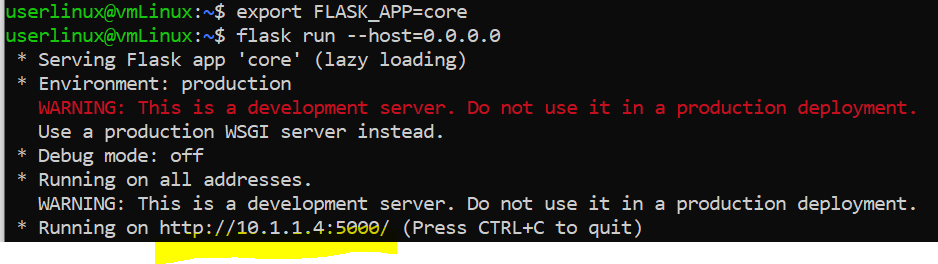

8. Com o flask ativo. Abra outro terminal e execute o SSH.

**Digite:** curl http://10.1.1.4:5000/

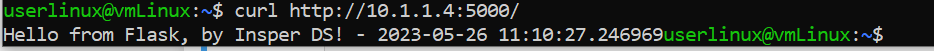


**Digite:**  curl http://10.1.1.4:5000/core
            
            
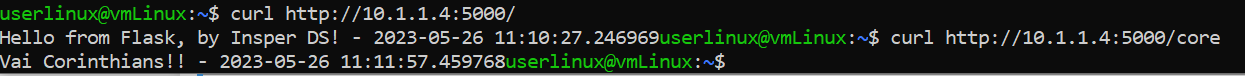